<a href="https://colab.research.google.com/github/imtiaznadaf/ai-lab/blob/main/GenAI_for_Image_Live_Class_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the Stability API



For this module, we will demonstrate several advanced uses and applications of commercial models.


Luckily for us, Stability AI has already prepackaged a lot of this functionality through their API.



The main intent of this notebook is to enable you to easily try out several of the applications we detailed in the class, so you can have a knack on how they work.


Treat this notebook as a playground. A generator enables you to render and try out different things, bounded only by your imagination. Take this after the class and try creating different kinds of content to your heart's desire.

# Getting started checklist:


Start by signing up to https://platform.stability.ai/ and making an account there.

Once you have an account, get your API key through this link: https://platform.stability.ai/account/keys


Then, go to https://platform.stability.ai/account/credits and purchase 5USD worth of credits. It will give you 500 credits


Finally, paste your API key on this cell, so you can run all of the examples in this notebook



In [ ]:
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import getpass
import time
from google.colab import output


api_key = "" #@param {type:"string"}
API_KEY = api_key


# Running Prompts

Let's get started by demonstrating how to use the API so we can access the latest generation of diffusion models.


As detailed in the class, the API gives you the ability to use different models in the Stable Diffusion toolkit, from SDXL to the brand new SD3 Ultra.

We'll start by learning how we can make requests for the API

## Headers, requests and parameters.

The stability API requires you to send it a request. Each request will contain the 3 following parts:


- **API URL**: This is the url that you send requests to. When a request is sent to this URL, it is first authenticated. If that is successful, it will go straight into the Stability servers, run the necessary models, and give you back the data that you want. Has the form `sk-KEY_NUMBER`
- **Headers:** Information parsed by the API, containing information on the type of request you're sending, along with authentication information
- **Data:** This is the part that contains the information requesting exactly what you want from the API. You will add prompts and other things directly related to image generation here.

In [ ]:
# This is the base url for the Stability API
BASE_STABILITY_URL = "https://api.stability.ai/"

# There are different endpoints in the stability API, corresponding to different kinds of
# functionality. For this initial demo, we will demonstrate 2 different routes.
#
# - SD3 Ultra: The most advanced model offered by stability
# - Stable Image Core: The base offering for stability.

SD3_ULTRA_ROUTE_URL = BASE_STABILITY_URL + "v2beta/stable-image/generate/ultra"
STABLE_IMAGE_CORE_URL = BASE_STABILITY_URL + "v2beta/stable-image/generate/core"


# As far as headers go, stability requires you to provide two things:
# authorization: Takes in your stability API key
# accept: tells the API to give you back an image
headers = {
    "accept": "image/*",
    "authorization": f"Bearer {API_KEY}", # This is fetching data from the API_KEY variable above.
}

## How to send data to stability.

To render images in text to image form, stability requires you to only send the following field:

- **prompt:** What you wish to see in the output image. A strong, descriptive prompt that clearly defines elements, colors, and subjects will lead to better results.



However, you also have a few options you can also use:

- **seed:** Remember in class, we talked about how diffusion starts from a random noise seed, and then the image is crafted by taking this random noise and turning it into an image? The API enables you to provide specific seeds. This is good for debugging different prompts. Set it to `0` to randomize the seed
- **negative_prompt:** Sometimes, we want to also detail things we don't want to see in our images. This negative prompt is used during the image generation step as a form of contrast to your original prompt. It forces the model to generate things that are closer to your prompt, but also far away from those negatives.
- **aspect_ratio:** (width:height) This is if you want to change the aspect ratio of the image. Say you want to generate a photo that would look like a vertical iphone selfie, for example. You have the option to pick an aspect ratio like (9:16) for that. Defaults to (1:1)
- **output_format:**: png, jpg or webp. Determines the type of image format that will be sent back to you.



Specifically for stable_core, you're also able to provide preset styles through this:

- *style_preset*:	3d-model analog-film anime cinematic comic-book digital-art enhance fantasy-art isometric line-art low-poly modeling-compound neon-punk origami photographic pixel-art tile-texture

This will guide your generation towards one of those specific styles

Let's then try making a request:



In [ ]:
import IPython
import requests


WHALE_PROMPT = "A majestic space whale, floating around in space, Ethereal, beautiful, 8k"

request_data = {
    "prompt": WHALE_PROMPT,
    "output_format": "png"
}

# This uses the python requests package to make requests to the stability API
response = requests.post(
    STABLE_IMAGE_CORE_URL,
    headers=headers,
    files={"none": ''},
    data=request_data,
)

if response.status_code == 200:
    with open("./whale_base.png", 'wb') as file:
        file.write(response.content)
else:
    raise Exception(str(response.json()))

IPython.display.Image("./whale_base.png")

Let's then define a function to make requests to this endpoint

---



In [ ]:
def make_stable_core_request(prompt, * , negative_prompt=None, style=None, aspect_ratio=None):
    fields_in_request = [{"prompt":prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    if style:
      fields_in_request.append({"style_preset":style})
    if aspect_ratio:
      fields_in_request.append({"aspect_ratio":aspect_ratio})

    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        STABLE_IMAGE_CORE_URL,
        headers=headers,
        files={"none": ''},
        data=request_data,
    )
    return response


# And another function to save the results to a file so we can see them
def save_image(response, filename):
  if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
  else:
    raise Exception(str(response.json()))

We can also add things like negative prompts, for things we don't want to see


In [ ]:

negative_prompt =  "spaceship, robotic, high tech",
negative_prompt_response = make_stable_core_request(WHALE_PROMPT, negative_prompt=negative_prompt)

save_image(negative_prompt_response, "negative_prompt.png")
IPython.display.Image("negative_prompt.png")

Some cool tricks:


To control the weight of a given word use the format (word:weight), where word is the word you'd like to control the weight of and weight is a value between 0 and 1. For example: The sky was a crisp (blue:0.3) and (green:0.8) would convey a sky that was blue and green, but more green than blue.


You can do this for both positive and negative prompts!

In [ ]:
request_more_planet = {
    "prompt": "A majestic space whale, floating around in space, (earthlike planet:0.8), (stars:0.2) Ethereal, beautiful, 8k",
    "negative_prompt": "humans, empty space",
    "output_format": "png"
}

more_planet_prompt = "A majestic space whale, floating around in space, (earthlike planet:0.8), (stars:0.2) Ethereal, beautiful, 8k"
more_stars_prompt = "A majestic space whale, floating around in space, (earthlike planet:0.2), (stars:0.8) Ethereal, beautiful, 8k"

more_stars_response = make_stable_core_request(more_stars_prompt)
more_planet_response = make_stable_core_request(more_planet_prompt)

save_image(more_stars_response, "more_stars.png")
save_image(more_planet_response, "more_planet.png")



This is the image with the prompt emphasizing stars

In [ ]:
IPython.display.Image("more_stars.png")

This is the image with the prompt emphasizing *planets*

In [ ]:
IPython.display.Image("more_planet.png")

And finally, we can play around and change the style. Let's do that.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


STABLE_CORE_STYLES = ["3d-model", "anime", "cinematic", "comic-book", "neon-punk" ,"origami", "photographic", "pixel-art", "tile-texture"]
style_responses = {}
whale_style_prompt = "A majestic space whale, floating around in space,ethereal, beautiful"
for style in STABLE_CORE_STYLES:
  style_responses[style] = make_stable_core_request(WHALE_PROMPT,style=style)
  save_image(style_responses[style], f"{style}.png")


# And then we can visualize all the responses and display the images
num_styles = len(STABLE_CORE_STYLES)
num_cols = 3
num_rows = (num_styles + num_cols - 1) // num_cols

# Plotting the images in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for idx, style in enumerate(STABLE_CORE_STYLES):
    img_path = f"{style}.png"
    img = mpimg.imread(img_path)
    ax = axes[idx // num_cols, idx % num_cols]
    ax.imshow(img)
    ax.set_title(style)
    ax.axis('off')

# Remove any empty subplots
for idx in range(num_styles, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()



# Inpainting Tool for the following sections

For the following sections, you will use this online tool to make masks. Save the masks locally to your google colab as **INPAINTING_MASK.png**


Link: https://huggingface.co/spaces/stevhliu/inpaint-mask-maker


# Inpainting and outpainting


We can similarly use the stability API to inpaint and outpaint stuff.

While in class, we explained the technical differences between inpainting, outpainting and erasing,
Stability has done a lot of that legwork for us, defining each of those functionalities already
as different API routes.

You can read more about their parameters here: https://platform.stability.ai/docs/api-reference#tag/Edit/paths/~1v2beta~1stable-image~1edit~1search-and-replace/post

**Now, take this image and save it to your local colab notebook** Name it "border_collie_base.jpeg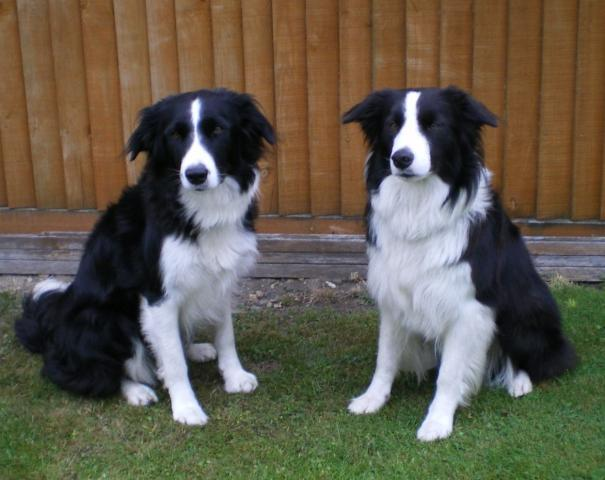"

** Now, click here on the left side, and upload the image here**

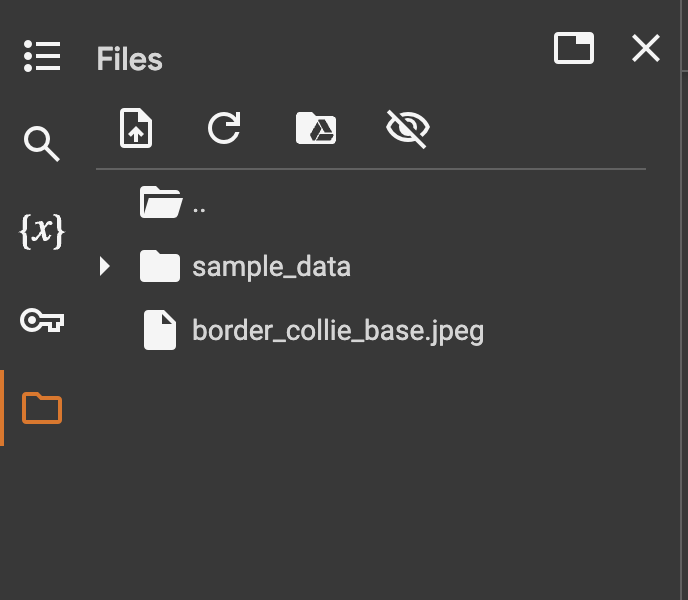

In [ ]:
# First, let's define different functions to create payloads for the different API routes.
# The way you call them is pretty similar:

# Inpainting: Similar to the original request for stablecore, but needs an image
# and a mask, to be inpainted over

# Erasing: Same as inpainting.


# Search and replace: Stablecore request, also takes in a search_prompt, that will find the content
# you're looking for and replace it

API_URLS = {
    "inpaint":BASE_STABILITY_URL + "v2beta/stable-image/edit/inpaint",
    "erase":BASE_STABILITY_URL + "v2beta/stable-image/edit/erase",
    "search_and_replace": BASE_STABILITY_URL + "v2beta/stable-image/edit/search-and-replace",
    "control_sketch": BASE_STABILITY_URL + "v2beta/stable-image/control/sketch",
    "control_structure": BASE_STABILITY_URL + "v2beta/stable-image/control/structure",
    "upscale_creative": BASE_STABILITY_URL + "v2beta/stable-image/upscale/creative"
}


def make_inpainting_request(prompt,image, mask, * , negative_prompt=None, grow_mask=None):
    fields_in_request = [{"prompt":prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    if grow_mask:
      fields_in_request.append({"grow_mask":grow_mask})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    # For all of those API routes, the image is provided through the "files" parameter
    # So is the mask
    response = requests.post(
        API_URLS["inpaint"],
        headers=headers,
        files={"image": open(image,"rb"),"mask":open(mask, "rb")},
        data=request_data,
    )
    return response

def make_erase_request(image, mask, *, grow_mask=None):
    fields_in_request = {}
    if grow_mask:
      fields_in_request.append({"grow_mask":grow_mask})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["erase"],
        headers=headers,
        files={"image": open(image,"rb"), "mask":open(mask, "rb")},
        data=request_data,
    )
    return response

def make_search_and_replace_request(prompt, image,search_prompt, *, negative_prompt=None):
    fields_in_request = [{"prompt":prompt,"search_prompt":search_prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["search_and_replace"],
        headers=headers,
        files={"image": open(image,"rb")},
        data=request_data,
    )
    return response

## Using the erase endpoint

First, let's use the erase endpoint to remove the border collie in the left from the picture.

Scroll up in this class notebook and use the inpainting tool to create a mask
around the border collie in the left. Save the mask as INPAINTING_MASK.png in the same place you saved the border collie images

In [ ]:
import base64
DOGGO_IMAGE = "/content/border_collie_base.jpeg"
INPAINTING_MASK = "/content/INPAINTING_MASK.png"
# And read the image as a bytestring
def read_image_as_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


In [ ]:
# Now, we call the erase API.
erase_response =  make_erase_request(image=DOGGO_IMAGE, mask=INPAINTING_MASK)

# And save the response for the eraseAPI
save_image(erase_response, "erasing_doggo.png")

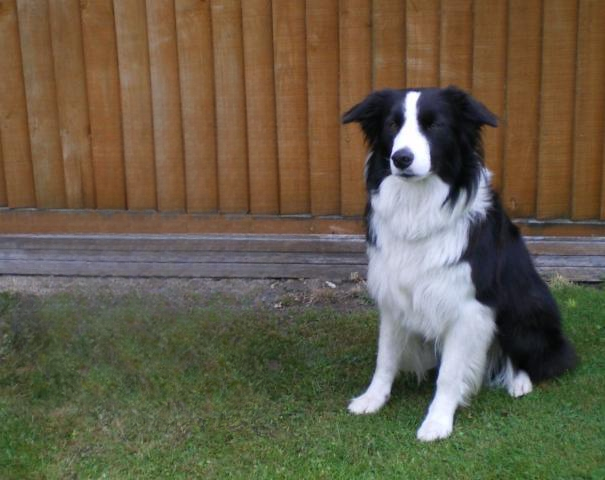

In [ ]:
# And we can visualize them
IPython.display.Image("erasing_doggo.png")


## Using the inpainting endpoint

Now, let's use the inpainting endpoint to modify the same image from before.

Except, this time, instead of replacing the dog on the left, we will replace it with
a grizzly bear cub


In [ ]:
inpainting_prompt = "A cute and fluffy grizzly bear cub, sitting down and panting playfully"

In [ ]:
inpainting_response = make_inpainting_request(prompt=inpainting_prompt, image=DOGGO_IMAGE, mask=INPAINTING_MASK)
save_image(inpainting_response, "inpainting_a_grizzly_cub.png")

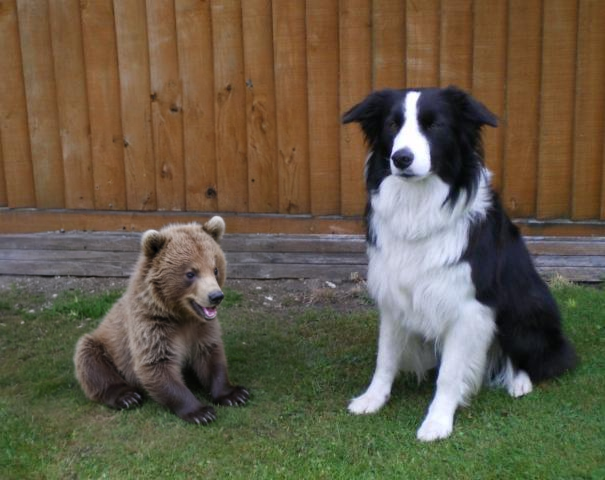

In [ ]:
IPython.display.Image("inpainting_a_grizzly_cub.png")

## Using the Search and Replace endpoint

Now, let's take our image with the border collie and the grizzly bear and replace the fence in the back with something cooler. What about we make it a wild forest?

In [ ]:
CUB_AND_DOGGO_IMAGE = "inpainting_a_grizzly_cub.png"
search_prompt = "Wooden fence"
replace_prompt = "A beautiful and magical forest, enchanted, portland oregon"
search_and_replace_response = make_search_and_replace_request(prompt=replace_prompt, image=CUB_AND_DOGGO_IMAGE, search_prompt=search_prompt)
save_image(search_and_replace_response, "doggo_and_cub_in_forest.png")

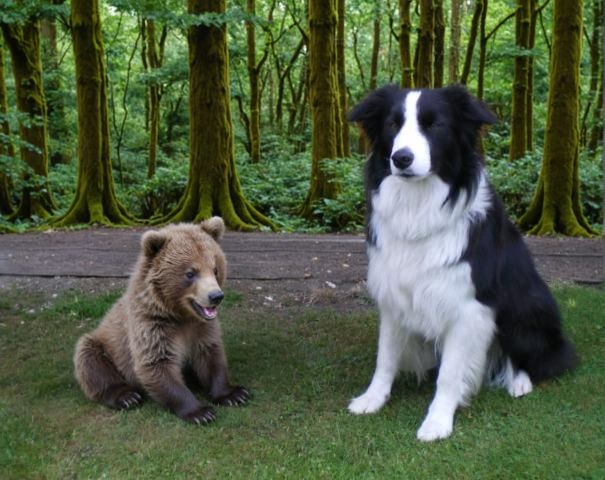

In [ ]:
IPython.display.Image("doggo_and_cub_in_forest.png")

### Bonus: Upscaling our forest critters


Diffusion models can also creatively upscale images

In [ ]:
# The body of the request should include:

# image
# prompt
# The body may optionally include:

# seed
# negative_prompt
# output_format
# creativity
# Note: for more detail

def make_creative_upscale_request(prompt, image, *,negative_prompt=None, creativity=None):
    fields_in_request = [{"prompt":prompt,"search_prompt":search_prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["upscale_creative"],
        headers=headers,
        files={"image": open(image,"rb")},
        data=request_data,
    )
    return response




In [ ]:
DOGGO_AND_CUB_IN_FOREST_IMAGE = "doggo_and_cub_in_forest.png"
creative_prompt = "A grizzly bear cub and a border collie in a magical, ethereal forest. They are surrounded by fae and fairies. The image evokes a sense of adventure and tranquility."
upscale_response = make_creative_upscale_request(prompt=creative_prompt, image=DOGGO_AND_CUB_IN_FOREST_IMAGE,negative_prompt="adult, old", creativity=0.35)


In [ ]:
# Upscale is expensive(25 credits) and takes a while, so we need to fetch the ID for this request
# and poll later to see if it's complete
job_id = upscale_response.json()["id"]
print(upscale_response.json())

{'id': '5460a90e309105b5415e3470445c646ccd2d2cc0dd90a5ba588eacf29d450821'}


In [ ]:
# Now, let's fetch our image. 200 means it's done, 202 means it's still rendering
get_upscaled_image_url = f"https://api.stability.ai/v2beta/stable-image/upscale/creative/result/{job_id}"
upscaled_image_response = requests.get(get_upscaled_image_url,headers=headers)
print(upscaled_image_response)

<Response [200]>


In [ ]:
# Save and display the image
save_image(upscaled_image_response, "upscaled_doggo_and_cub.png")

In [ ]:
IPython.display.Image("upscaled_doggo_and_cub.png")

# Controlnet drawing tool for the controlnet section:

For the following sections, you will use this tool on google colab. It lets you draw different sketches that you can submit to the stability API

https://www.autodraw.com/


# Controlling image generation


We can also use a controlnet to control our generation

Here is the API documentation: https://platform.stability.ai/docs/api-reference#tag/Control


Let's start by drawing a sketch using the tool I've made above. And then, make controlnet create a cool image from our drawing

In [ ]:
#The body of the request should include:

# image
# prompt
# The body may optionally include:

# control_strength
# negative_prompt
# seed
# output_format

def make_control_sketch_request(prompt, image,*, control_strength=None, negative_prompt=None, seed=None):
    fields_in_request = [{"prompt":prompt,"search_prompt":search_prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    if control_strength:
      fields_in_request.append({"control_strength":control_strength})
    if seed:
      fields_in_request.append({"seed":seed})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["control_sketch"],
        headers=headers,
        files={"image": open(image,"rb")},
        data=request_data,
    )
    return response



def make_control_structure_request(prompt, image,*, control_strength=None, negative_prompt=None, seed=None):
    fields_in_request = [{"prompt":prompt,"search_prompt":search_prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    if control_strength:
      fields_in_request.append({"control_strength":control_strength})
    if seed:
      fields_in_request.append({"seed":seed})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["control_structure"],
        headers=headers,
        files={"image": open(image,"rb")},
        data=request_data,
    )
    return response


## Making content with your sketches


Go to the drawing tool above and draw something. You don't have to be a professional artist, just sketch like you would in a piece of paper. After you're done, save your drawing as MY_SKETCH.png




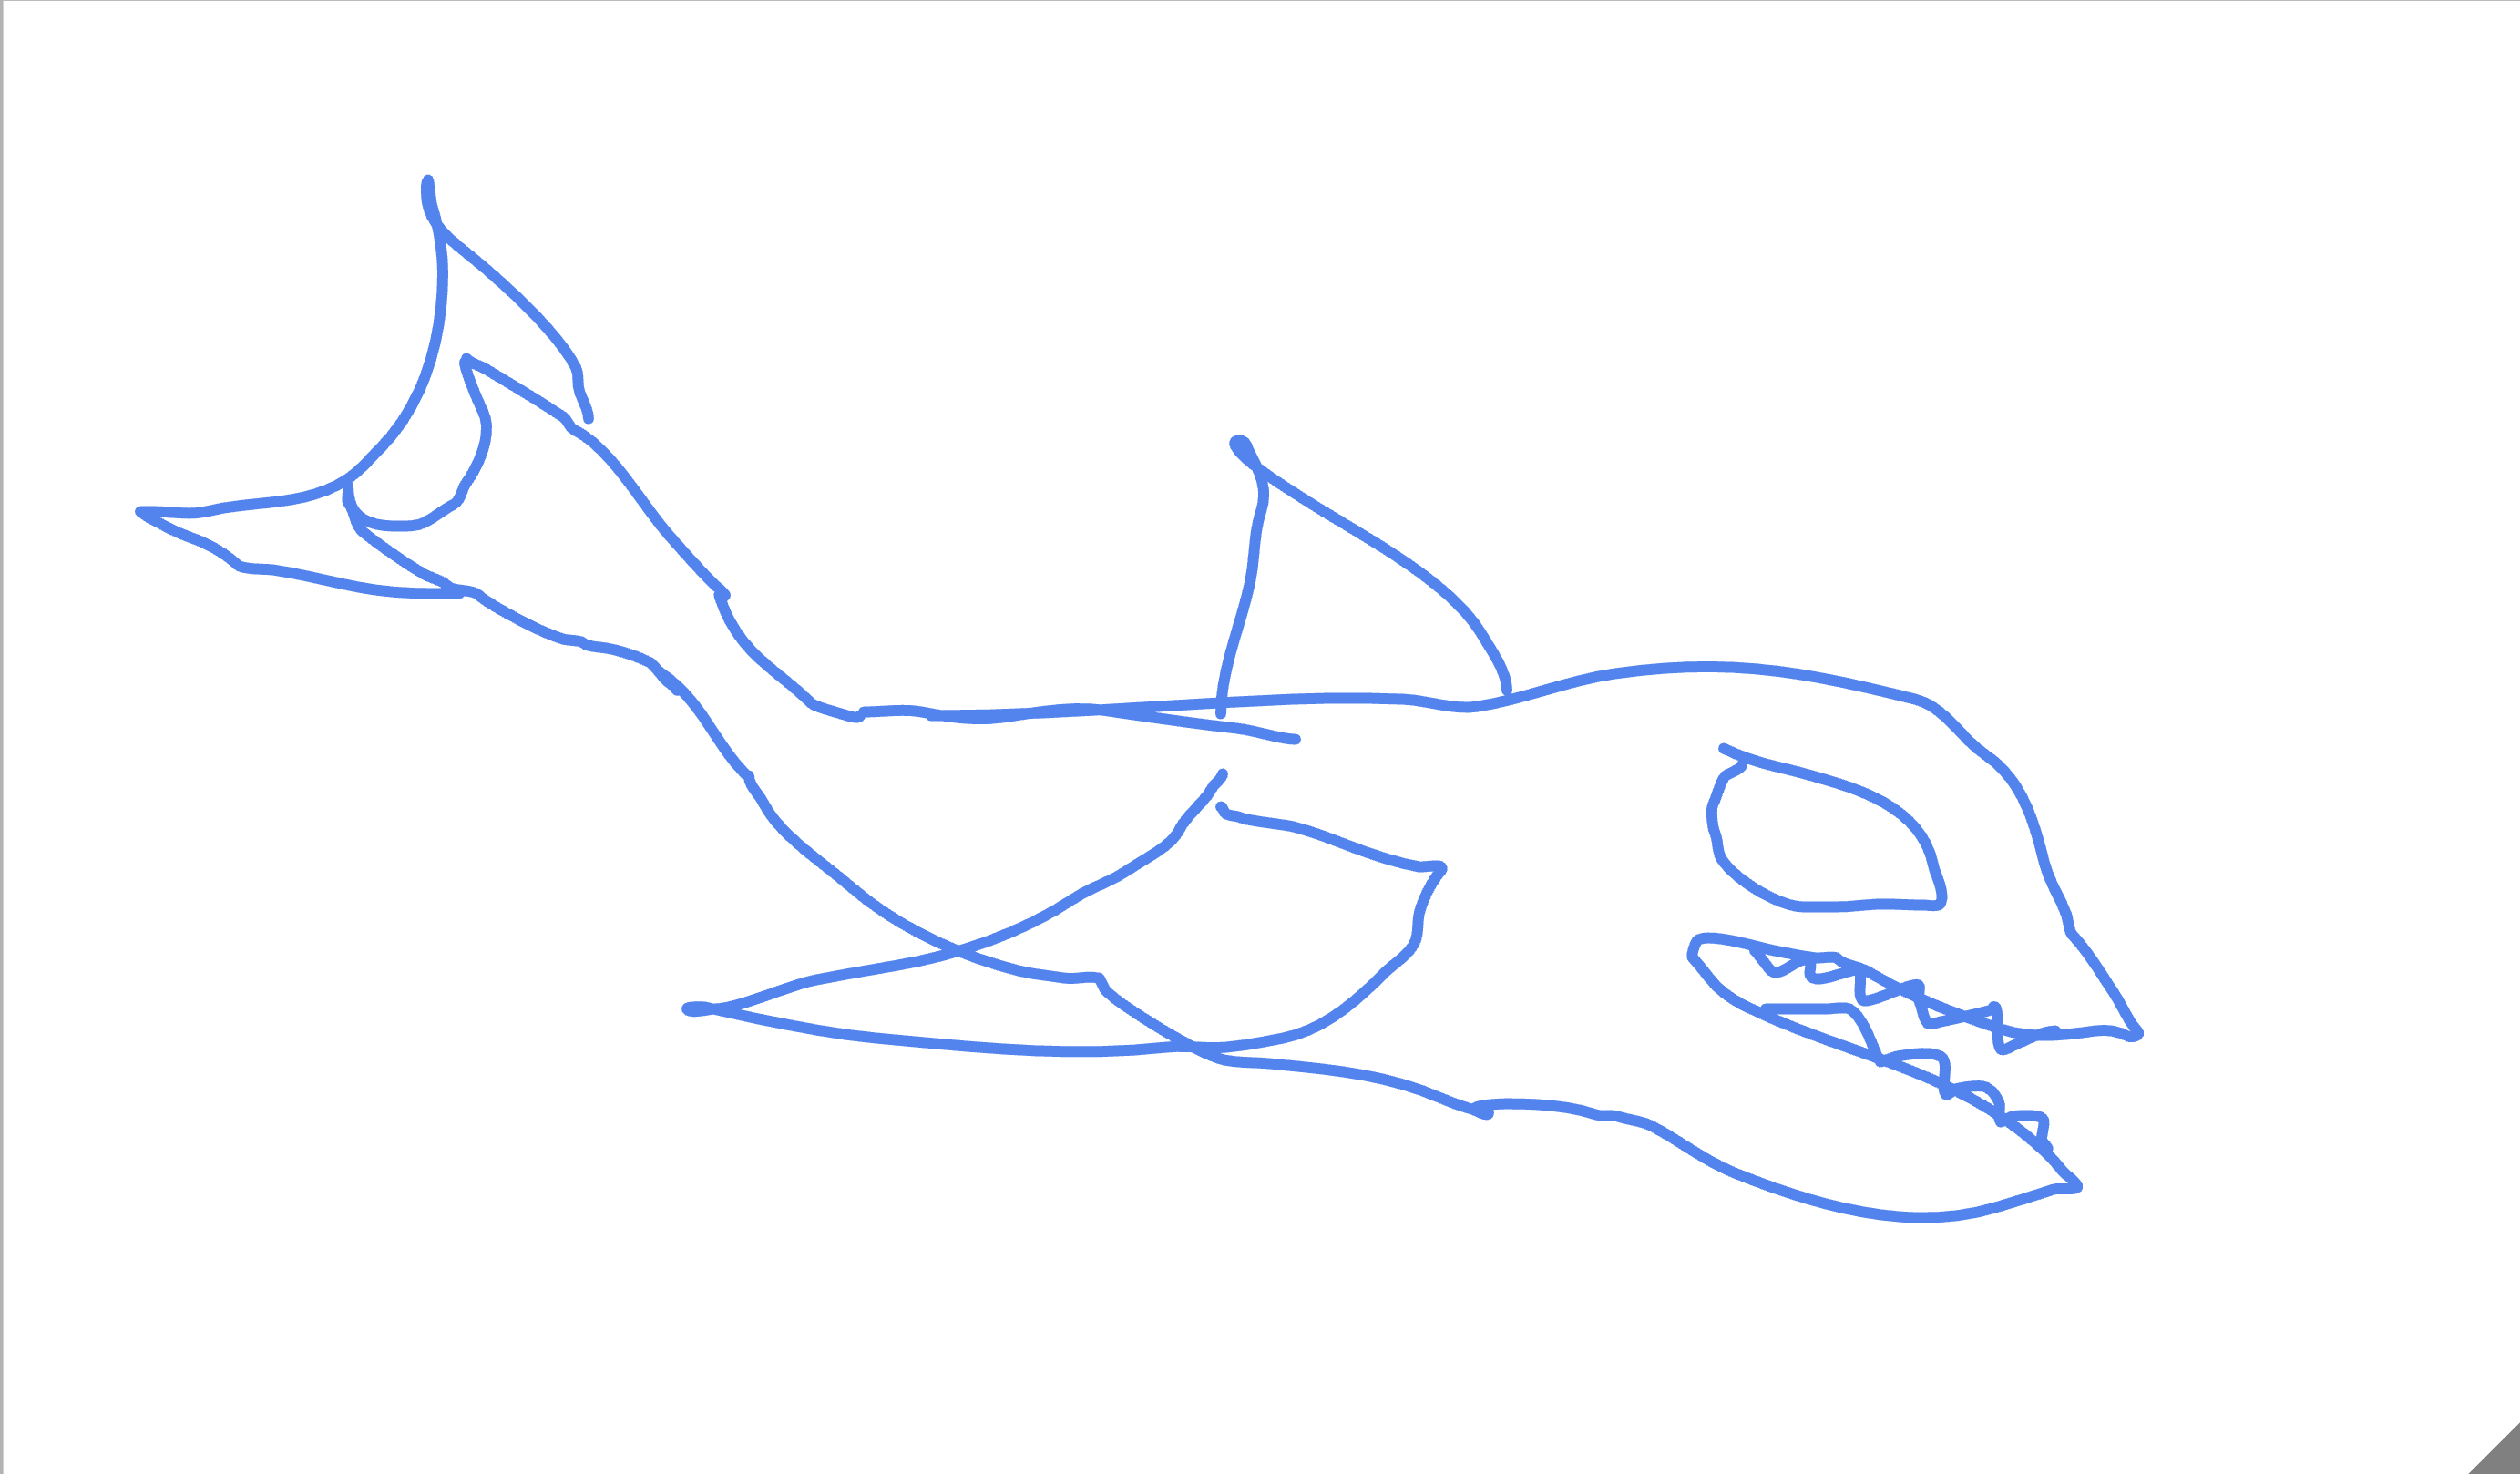

In [ ]:
# Now, set this prompt to what you want your sketch to turn into
sketch_prompt = "A steampunk orca killer whale, flying amidst the clouds"
SKETCH_FILE = "/content/MY_SKETCH.png"
IPython.display.Image("MY_SKETCH.png")

In [ ]:
sketch_response = make_control_sketch_request(prompt=sketch_prompt, image=SKETCH_FILE, control_strength=0.7)
save_image(sketch_response, "my_drawing_rendered.png")

In [ ]:
IPython.display.Image("my_drawing_rendered.png")

## Finally, let's try to control it with structure!
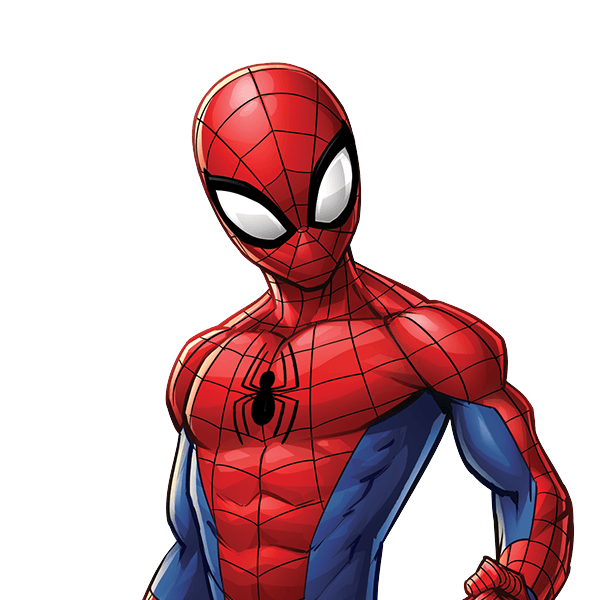
You know the drill! Save the image here as spiderman.png



In [ ]:
spiderman_image_structure = "/content/spiderman.png"
structure_prompt = "A photo of spiderman in a 50s carnival, with elephants and fire spitters in the background"

structure_response = make_control_structure_request(prompt=structure_prompt, image=spiderman_image_structure, control_strength=0.7)
save_image(structure_response, "spiderman_selfie.png")

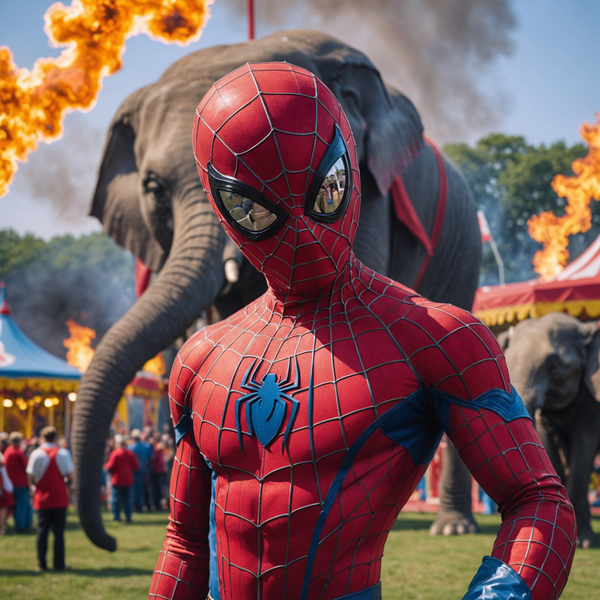

In [ ]:
IPython.display.Image("spiderman_selfie.png")